# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [4]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output file (csv)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [74]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#cities = ["tilichiki", "london"]
# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
query_url = f'{url}appid={api_key}&units={units}&q='

In [76]:
i = 1
data = []
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing city #{i}: {city}")
        data.append({
            'longitude': response['coord']['lon'], 
            'latitude': response['coord']['lat'],
            'temperature': response['main']['temp'],
            'humidity': response['main']['humidity'],
            'cloudiness': response['clouds']['all'],
            'wind speed': response['wind']['speed'],
            'city': response['name'],
            'country': response['sys']['country'],
            'date': response['dt']
        })
        i += 1

Processing city #1: tasiilaq
Processing city #2: rikitea
Processing city #3: rize
Processing city #4: muisne
Processing city #5: ushuaia
Processing city #6: arraial do cabo
Processing city #7: vaini
Processing city #8: nemuro
Processing city #9: isangel
Processing city #10: talnakh
Processing city #11: mataura
Processing city #12: kapaa
Processing city #13: clyde river
Processing city #14: grand gaube
Processing city #15: aracati
Processing city #16: port hardy
Processing city #17: kodiak
Processing city #18: bluff
Processing city #19: hami
Processing city #20: albany
Processing city #21: punta arenas
Processing city #22: port elizabeth
Processing city #23: rosarito
Processing city #24: guerrero negro
Processing city #25: torbay
Processing city #26: conceicao do araguaia
Processing city #27: komsomolskiy
Processing city #28: hobart
Processing city #29: leticia
Processing city #30: bethel
Processing city #31: jamestown
Processing city #32: rapid valley
Processing city #33: san carlos de

Processing city #266: zelenoborskiy
Processing city #267: sur
Processing city #268: tam ky
Processing city #269: beringovskiy
Processing city #270: cherskiy
Processing city #271: imeni morozova
Processing city #272: hai duong
Processing city #273: nikolayevka
Processing city #274: ahipara
Processing city #275: port-gentil
Processing city #276: lagoa
Processing city #277: corralillo
Processing city #278: sandane
Processing city #279: joshimath
Processing city #280: bonnyville
Processing city #281: pangnirtung
Processing city #282: la mira
Processing city #283: hasaki
Processing city #284: narsaq
Processing city #285: san ignacio
Processing city #286: san felipe
Processing city #287: college
Processing city #288: bara
Processing city #289: longyearbyen
Processing city #290: marienburg
Processing city #291: san patricio
Processing city #292: coihaique
Processing city #293: missoula
Processing city #294: rzeszow
Processing city #295: batagay-alyta
Processing city #296: tambacounda
Processi

Processing city #526: la spezia
Processing city #527: someshwar
Processing city #528: nantucket
Processing city #529: mardin
Processing city #530: santiago del estero
Processing city #531: boa vista
Processing city #532: ribas do rio pardo
Processing city #533: hobyo
Processing city #534: buzmeyin
Processing city #535: ponta delgada
Processing city #536: boda
Processing city #537: gobabis
Processing city #538: chengde
Processing city #539: nara
Processing city #540: manaure


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
df = pd.DataFrame(data)
df.to_csv('test.csv', index = False)
df.dtypes

city            object
cloudiness       int64
country         object
date             int64
humidity         int64
latitude       float64
longitude      float64
temperature    float64
wind speed     float64
dtype: object

In [78]:
df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,temperature,wind speed
0,Tasiilaq,88,GL,1552787400,67,65.61,-37.64,-8.00,0.50
1,Rikitea,80,PF,1552792201,100,-23.12,-134.97,25.42,11.05
2,Rize,75,TR,1552791000,87,41.02,40.52,7.12,1.50
3,Muisne,8,EC,1552792201,97,0.61,-80.02,21.82,1.35
4,Ushuaia,20,AR,1552788000,87,-54.81,-68.31,7.00,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

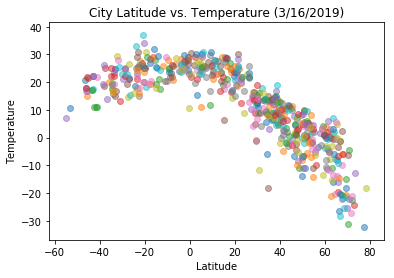

In [91]:
for dat in data:
    x = dat['latitude']
    y = dat['temperature']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Temperature (3/16/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('Figure1_Latitude_Temperature.png')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

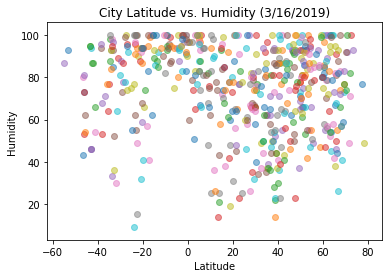

In [92]:
for dat in data:
    x = dat['latitude']
    y = dat['humidity']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Humidity (3/16/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Figure2_Latitude_Humidity.png')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

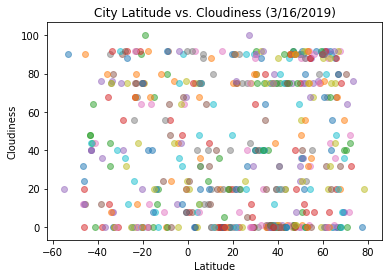

In [93]:
for dat in data:
    x = dat['latitude']
    y = dat['cloudiness']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Cloudiness (3/16/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Figure3_Latitude_Cloudiness.png')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

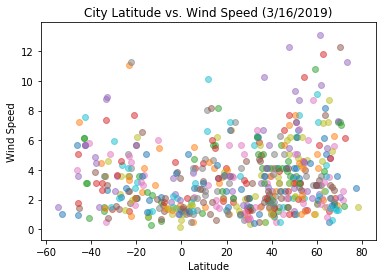

In [94]:
for dat in data:
    x = dat['latitude']
    y = dat['wind speed']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Wind Speed (3/16/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Figure4_Latitude_Wind_Speed.png')
plt.show

In [ ]:
# Observation 1: Figure 1 shows a significant decrease as latitude increases.
# Observation 2: Figure 2 and Figure 4 show opposite correlations between humidity vs. latitude and wind speed vs. latitude.
# Observation 3: Figure 3 shows that there is no correlation between cloudiness and latitude.